<a href="https://colab.research.google.com/github/OrenBochman/jupyter-adventures/blob/master/Interactive_Python_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Internteactive Grapraphics ?</h1>


## Gerer the mCars data. - its a classic mutdimensional datasets 

Its a classic dataset for ndim data

In [1]:
import pandas as pd
mtcars= pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv") 
mpg_corr  = mtcars.corr().round(2)
mpg_corr


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


**bold text**## Matplot Lib

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

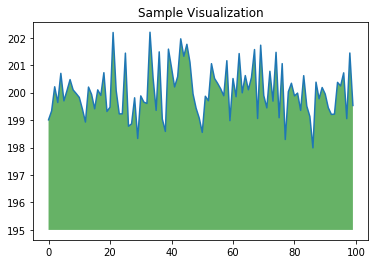

In [2]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

# Alatair Bar Chart

In [0]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

## plot the dataset, referencing dataframe column names

In [4]:
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
)

alt.Chart(...)

In [0]:
## Bar chart with rounded corners, column stacked by the origen dimension.

In [6]:
import altair as alt
alt.Chart(cars).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
  color="Origin",

)

alt.Chart(...)

## Bar chart with rounded corners, columns unstacked faceted using the origen dimension.

this graph is hard to read. perhaps it could be layered?

In [7]:
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar(opacity=0.7).encode(
  alt.X('Miles_per_Gallon',bin=True),
  #x='Origin:N',
  alt.Y('count()',stack=None),
  color="Origin:N",
  
  #column='year(Year)'
#  column="year(Year):O",
)

alt.Chart(...)


Altair Scatterplot with color by origne and a legend

In [8]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

alt.Chart(...)

In [9]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

alt.Chart(...)

## Altair: Interactive brushing of linked scatterplots 

In [10]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

base.encode(x='Acceleration') | base.encode(x='Horsepower')

alt.HConcatChart(...)

## Altair: Interactive brushing scatterplot linked to  historam  

In [11]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

## Altair Scatterplot with mean treand line  faceted by origen

In [12]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

points = alt.Chart(cars).mark_point().encode(
  x='Year:T',
  y='Miles_per_Gallon',
  color='Origin'
).properties(
  width=800
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='mean(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800
).interactive(bind_y=False)
              
points + lines

alt.LayerChart(...)

In [0]:
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

Using widgets to make dynamic charts.

#Altair: trellis chart: dims and metrics linked to ipywidgets

In [15]:
import ipywidgets as wd
from ipywidgets import interactive, interact, HBox, Layout,VBox
from vega_datasets import data

dataset= wd.Dropdown(options=data.list_datasets(),value='cars',description='Datset:')
print("Dataset")
display(dataset)      
source = data(dataset.value)

x= wd.Dropdown(options=source.columns,value='Horsepower',description='X axis:',)
y= wd.Dropdown(options=source.columns,value='Miles_per_Gallon',description='Y axis:')
row= wd.Dropdown(options=source.columns,value='Year',description='Row:')
column= wd.Dropdown(options=source.columns, value='Origin', description='column')
color= wd.Dropdown(options=source.columns, value='Cylinders',description='color')
size= wd.Dropdown(options=source.columns,value='Cylinders',description='size')
print("Dimensions")
display(HBox([row,column,color,size], 
             layout = Layout(flex_flow='row wrap')))
print("Metrics")
display(HBox([x,y], 
             layout = Layout(flex_flow='row wrap')))
#source


Dataset


Dropdown(description='Datset:', index=9, options=('7zip', 'airports', 'annual-precip', 'anscombe', 'barley', '…

Dimensions


Metrics


In [16]:
import altair as alt
from vega_datasets import data
#source = data.cars()
alt.Chart(source).mark_point().encode(
    alt.X(x.value,type='quantitative'),
    alt.Y(y.value,type='quantitative'),
    alt.Column(column.value,type="nominal"),
    alt.Row(row.value,type="temporal",timeUnit='year'),
    #row='Year',
    alt.Color(color.value,type="nominal", legend=alt.Legend(title="Cylinders")),
    alt.Size(size.value),
    alt.Shape('Cylinders:N'),
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
)

alt.Chart(...)

## Big Trellis

### TODO: make it smaller.

In [17]:
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [18]:
import altair as alt
from vega_datasets import data


alt.Chart(mtcars).mark_point().encode(
    x='hp:Q',
    y='mpg:Q',
    #column='am:N',
    column='cyl:N',
    size=alt.Color('carb:N', legend=alt.Legend(title="Carborators")),
    color=alt.Color('am:N', legend=alt.Legend(title="Transmission")),
    tooltip=['model', 'hp', 'mpg'],

)

alt.Chart(...)

Altair: Horizontal stacked bar chart.

In [43]:
import altair as alt
from vega_datasets import data

source = data.barley()

alt.Chart(source).mark_bar().encode(
    column='year',
    x='yield',
    y='variety',
    color='site'
).properties(width=220)


alt.Chart(...)

In [19]:
#altair end

## Select dataset, dimensions and metrics

In [20]:

# Using pip
!pip install plotnine

In [40]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, labs
from plotnine.data import mtcars, mpg

print(mtcars.columns)
print(mpg.columns)

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')
Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


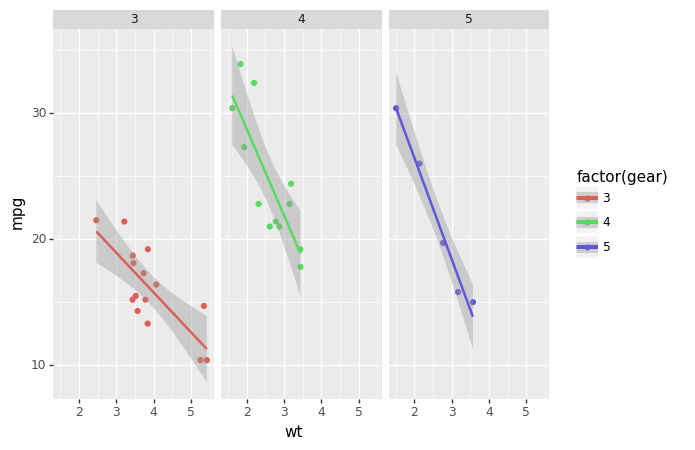

<ggplot: (-9223363299135333965)>

In [41]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

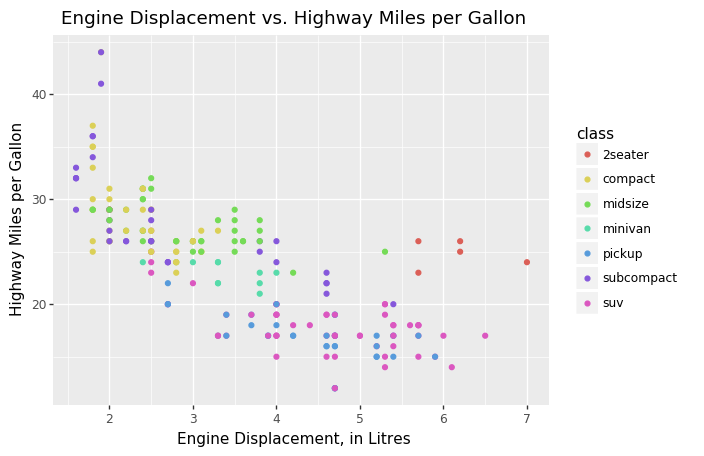

<ggplot: (8737719458326)>

In [42]:
(ggplot(mpg)
 + aes(x='displ', y='hwy', color='class')
 + geom_point()
 + labs(title='Engine Displacement vs. Highway Miles per Gallon', x='Engine Displacement, in Litres', y='Highway Miles per Gallon')
)

## ggplot scatter plot of carat against price with color and shape 

## adding a smooth curve to the scatter plot using loess regression
 (slow on big datasets)



Trellis plot comparing origin with cylinder points encoded

#ggplot


https://plotnine.readthedocs.io/en/stable/api.html#datasets

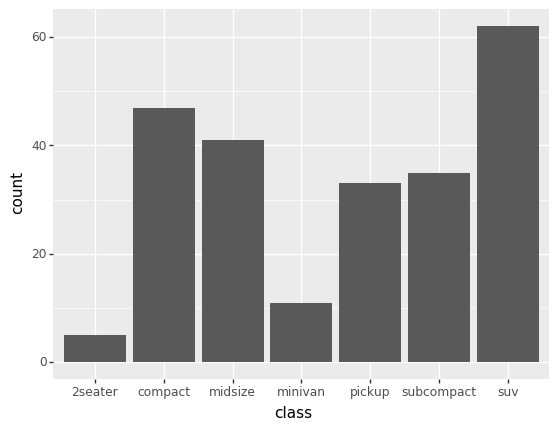

<ggplot: (8737719327787)>

In [44]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

(ggplot(mpg)         # defining what data to use
 + aes(x='class')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)


/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale_shape.py:81: PlotnineWarning: Using shapes for an ordinal variable is not advised.
  PlotnineWarning


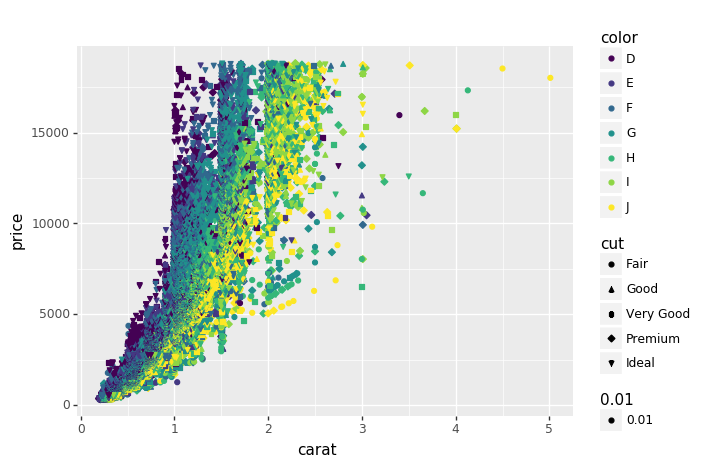

<ggplot: (-9223363299135492562)>

In [45]:
from plotnine.data import diamonds

#from scikit import scikit-misc
(ggplot(diamonds, aes("carat", "price", color= 'color', shape= 'cut', alpha=0.01))
 + geom_point() 

)

In [46]:
 !pip install scikit-misc # for loess


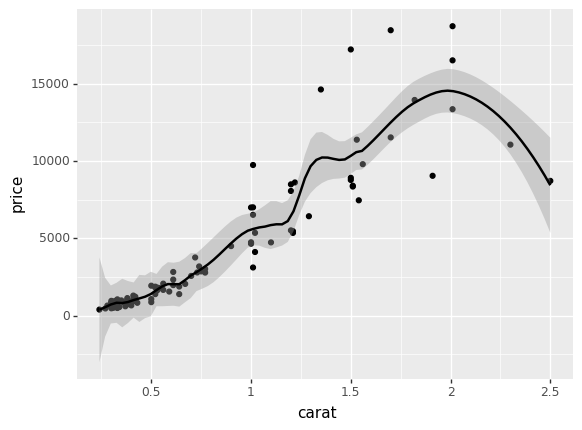

<ggplot: (-9223363299135525383)>

In [47]:
np.random.seed(0) 
# ensure the following will always be the same subset.
dsmall = diamonds.sample(n = 100) 

#from scikit import scikit-misc
(ggplot(dsmall, aes("carat", "price"))
 + geom_point() 
 + stat_smooth(method='loess', span=0.2) # high jitter
)

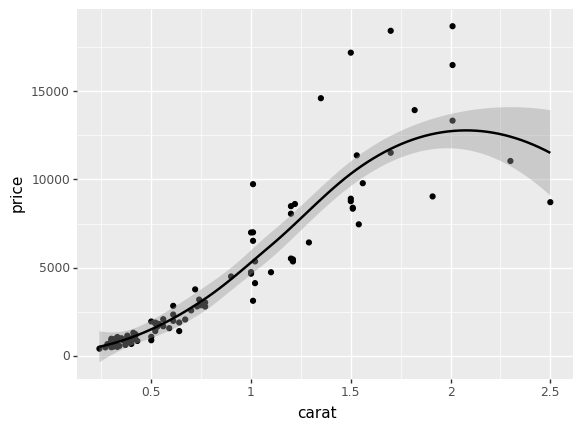

<ggplot: (-9223363299135334000)>

In [48]:
#from scikit import scikit-misc
(ggplot(dsmall, aes("carat", "price"))
 + geom_point() 
 + stat_smooth(method='loess', span=0.9) #lowlow jitter
)

# Sympy to render a formula

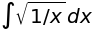

In [49]:
# try it out:
import sympy
sympy.init_printing()
x = sympy.symbols('x')
sympy.Integral(sympy.sqrt(1 / x), x)